In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import time
#modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix

from yellowbrick.classifier import ClassificationReport

In [143]:
df = pd.read_csv('agaricus-lepiota.csv')

In [144]:
df.rename(columns = { 'p': 'poisonous', 'x':'cap_shape', 's': 'cap_surface','n':'cap_color',
                     't': 'bruises', 'p.1': 'odor', 'f': 'gill_attachment',
                     'c': 'gill_spacing', 'n.1': 'gill_size', 'k': 'gill_color',
                     'e': 'stalk_shape', 'e.1': 'stalk_root', 's.1': 'stalk_surface_above_ring',
                     's.2': 'stalk_surface_below_ring', 's.2': 'stalk_surface_below_ring',
                     'w': 'stalk_color_above_ring', 'w.1':'stalk_color_below_ring', 'p.2':'veil_type',
                     'w.2': 'veil_color', 'o': 'ring_number', 'p.3': 'ring_type', 'k.1':'spore_print_color',
                     's.3': 'population', 'u': 'habitat'}, inplace = True)

In [145]:



#features X
df['cap_shape'] = df['cap_shape'].replace(['b','c','x','f'], ['bell','conical', 'convex', 'flat'])
df['cap_surface'] = df['cap_surface'].replace(['f', 'g', 'y', 's'], ['fibrous', 'grooves', 'scaly','smooth'])
df['cap_color'] = df['cap_color'].replace(['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon','gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'])
df['bruises'] = df['bruises'].replace(['t', 'f'], ['yes', 'no'])
df['odor'] = df['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'])
df['gill_attachment'] = df['gill_attachment'].replace(['a', 'd', 'f', 'n'], ['attached', 'descending', 'free', 'notched'])
df['gill_spacing'] = df['gill_spacing'].replace([ 'c', 'w', 'd'], ['close', 'crowded', 'distant'])
df['gill_size'] = df['gill_size'].replace([ 'b', 'n'], ['broad', 'narrow'])
df['gill_color'] = df['gill_color'].replace([ 'k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'])
df['stalk_shape'] = df['stalk_shape'].replace([ 'e', 't'], ['enlarging', 'tapering'])
df['stalk_root'] = df['stalk_root'].replace(['b', 'c', 'u', 'e', 'z', 'r', '?'], ['bulbous', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted', 'missing'])
df['stalk_surface_above_ring'] = df['stalk_surface_above_ring'].replace([ 'f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'])
df['stalk_surface_below_ring'] = df['stalk_surface_below_ring'].replace([ 'f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'])
df['stalk_color_above_ring'] = df['stalk_color_above_ring'].replace([ 'n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'])
df['stalk_color_below_ring'] = df['stalk_color_below_ring'].replace([ 'n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'])
df['veil_type'] = df['veil_type'].replace([ 'p', 'u'], ['partial', 'universal'])
df['veil_color'] = df['veil_color'].replace([ 'n', 'o', 'w', 'y'], ['brown', 'orange', 'white', 'yellow'])
df['ring_number'] = df['ring_number'].replace([ 'n', 'o', 't'], ['none', 'one', 'two'])
df['ring_type'] = df['ring_type'].replace([ 'c', 'e', 'f', 'l', 'n', 'p', 's', 'z'], ['cobwebby', 'evanescent', 'flaring', 'large', 'none', 'pendant', 'sheathing', 'zone'])
df['spore_print_color'] = df['spore_print_color'].replace([ 'k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow'])
df['population'] = df['population'].replace(['a', 'c', 'n', 's', 'v', 'y'], ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'])
df['habitat'] = df['habitat'].replace(['g', 'l', 'm', 'p', 'u', 'w', 'd'], ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'])


In [146]:
#target y 

#1 is poisonous 0 is edible
df['poisonous'] = df['poisonous'].replace(['e', 'p'], [0 , 1])

In [ ]:
def plotdata(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc = {'figure.figsize': (8, 6)})
        x = sns.countplot(x= data[col], hue = hue, data = data)

# EDA 

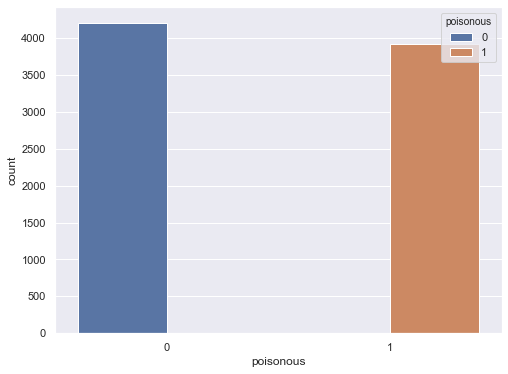

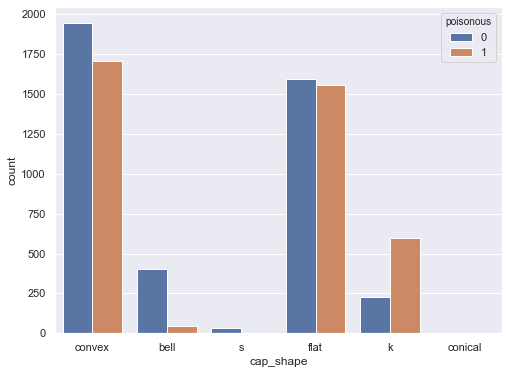

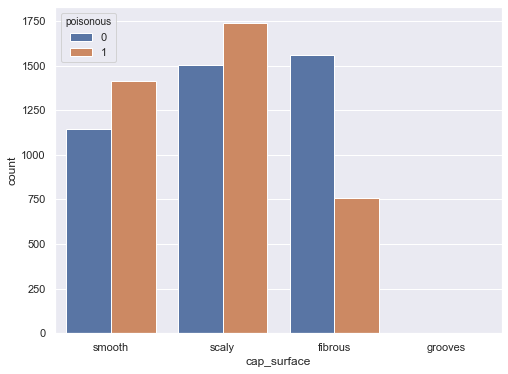

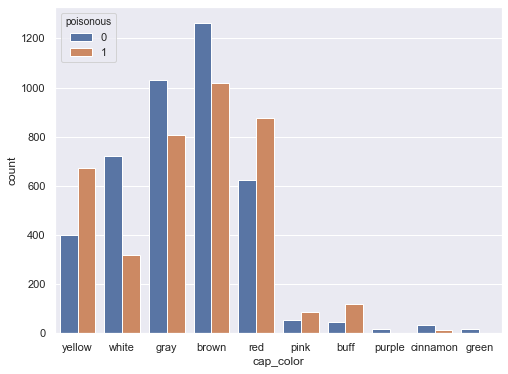

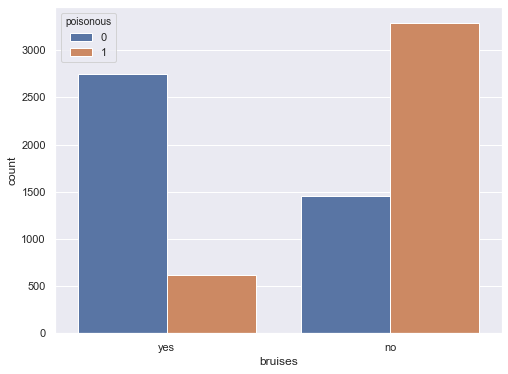

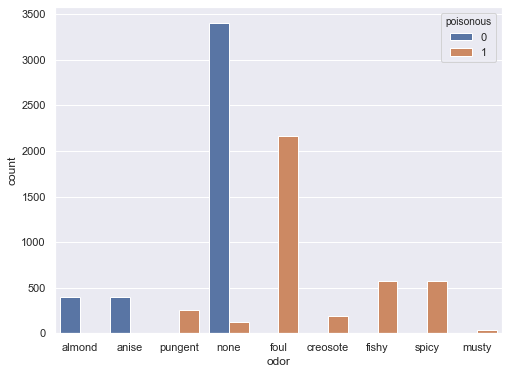

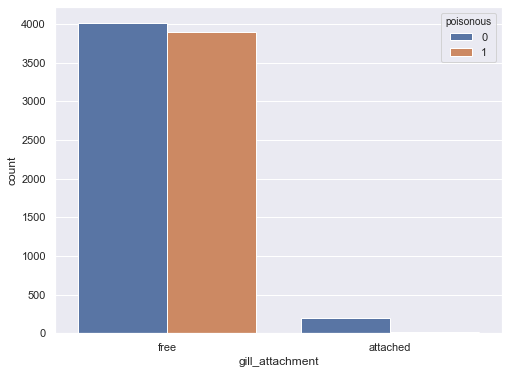

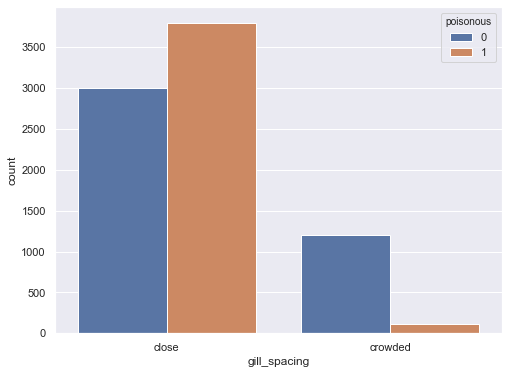

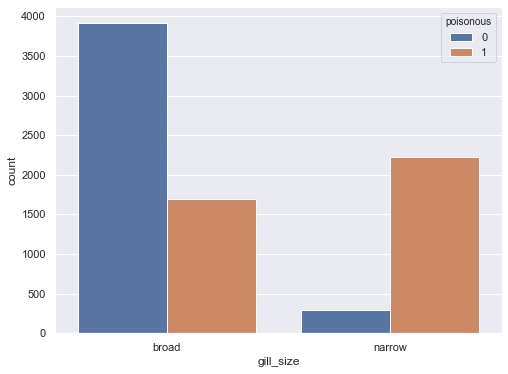

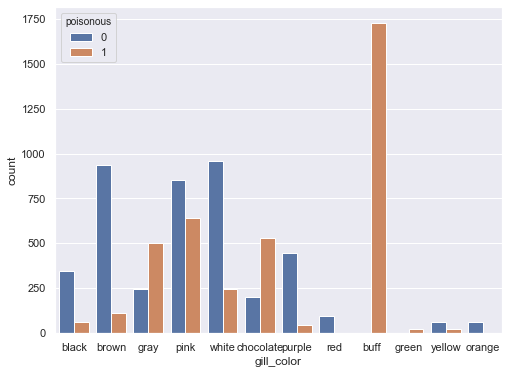

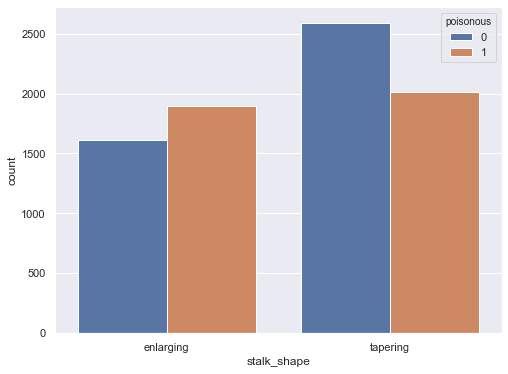

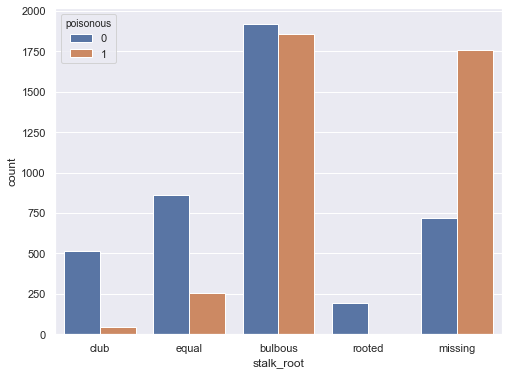

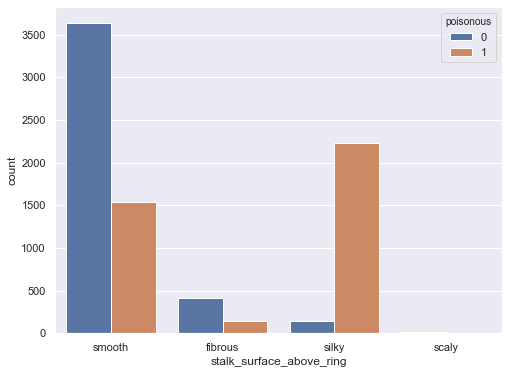

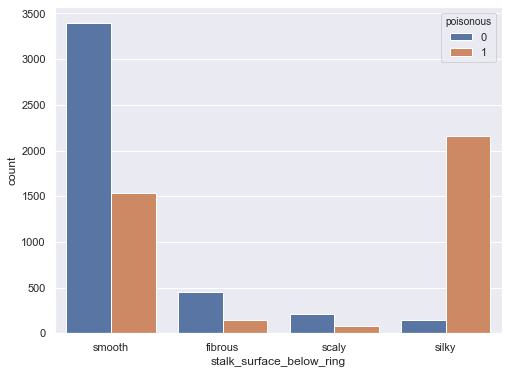

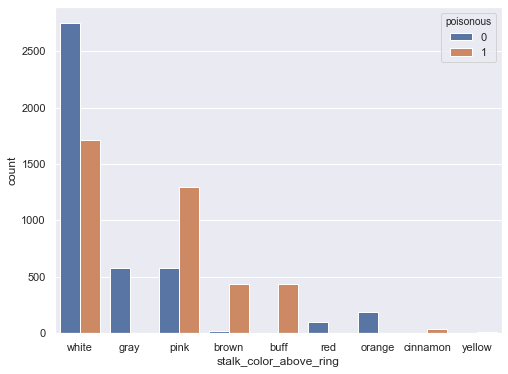

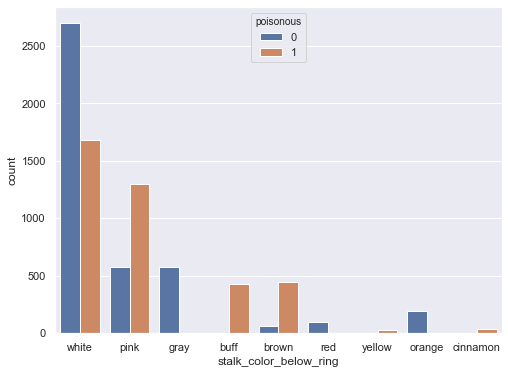

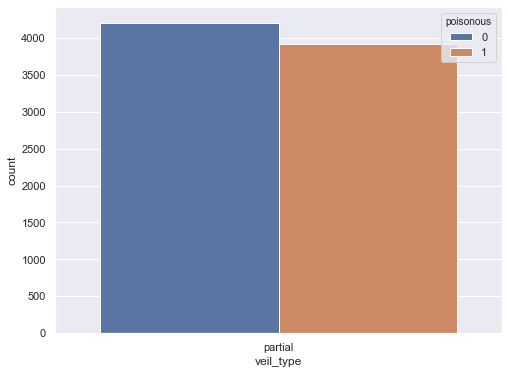

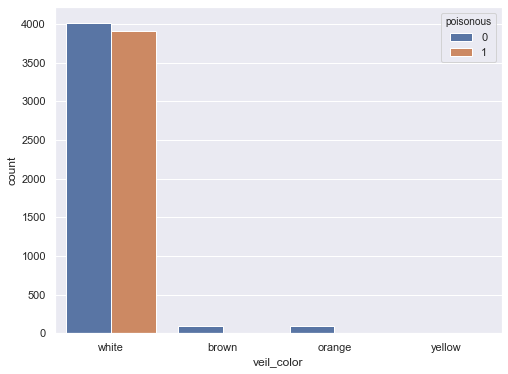

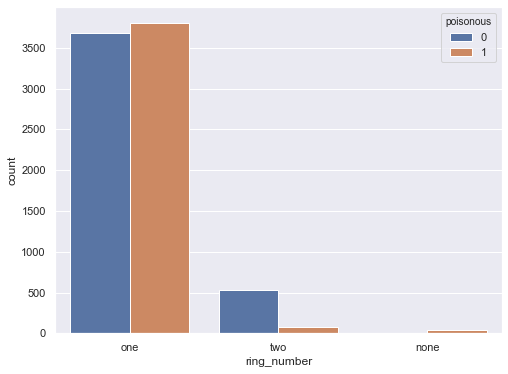

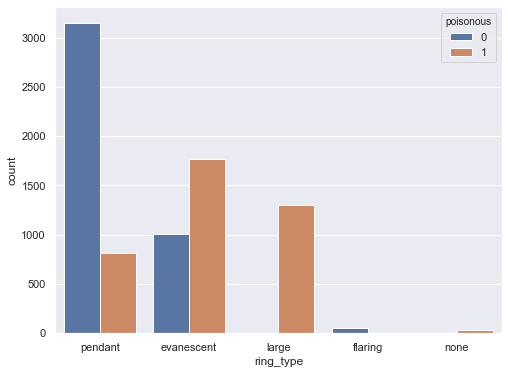

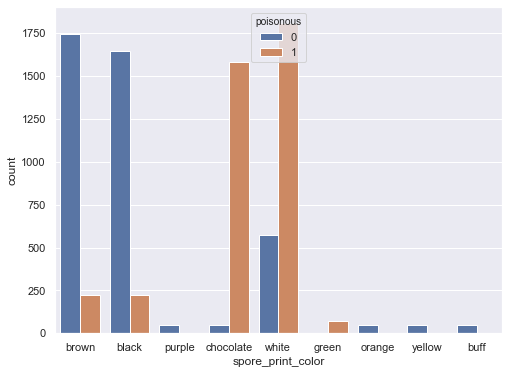

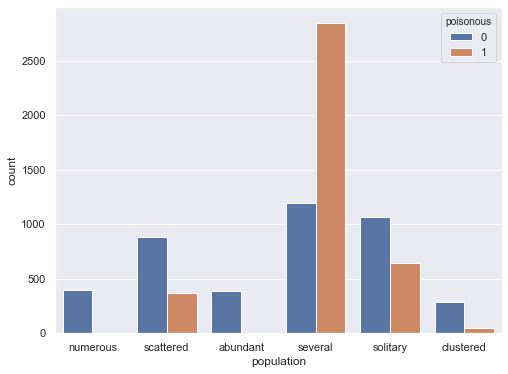

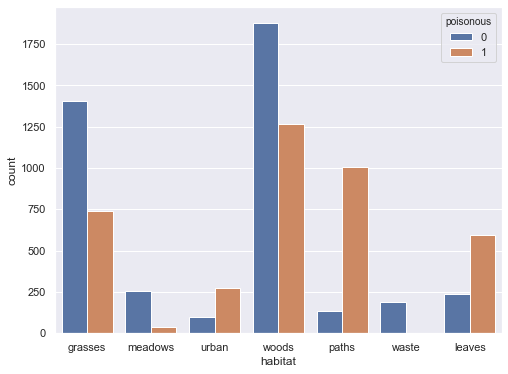

In [9]:
plotdata(df['poisonous'], df)

In [13]:
df['odor'].value_counts

<bound method IndexOpsMixin.value_counts of 0        almond
1         anise
2       pungent
3          none
4        almond
         ...   
8118       none
8119       none
8120       none
8121      fishy
8122       none
Name: odor, Length: 8123, dtype: object>

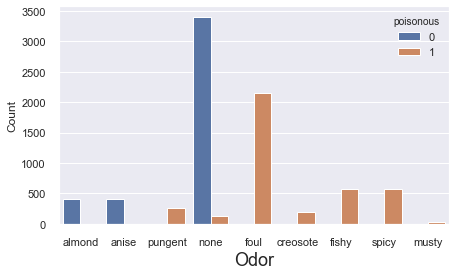

In [189]:
fig, ax = plt.subplots(figsize = (7,4))

sns.set(style = 'darkgrid')

sns.countplot(df['odor'], hue = 'poisonous', data = df)
plt.xlabel('Odor', fontsize = 18)
plt.ylabel('Count', fontsize = 12)
plt.show()





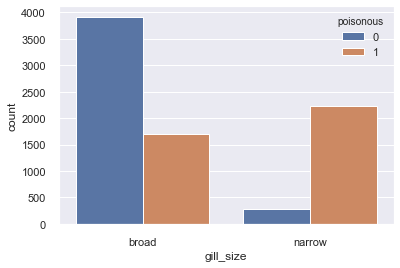

In [190]:
sns.countplot(df['gill_size'], hue = 'poisonous', data = df)

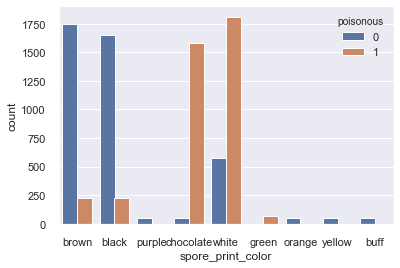

In [200]:
sns.countplot(df['spore_print_color'], hue = 'poisonous', data = df)

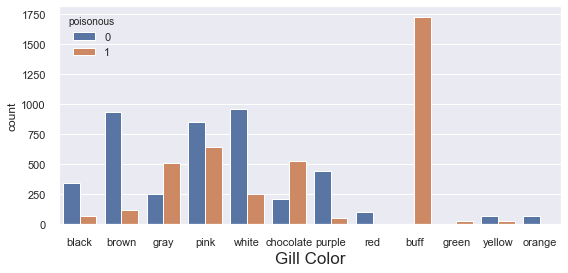

In [199]:
fig, ax = plt.subplots(figsize = (9,4))

sns.countplot(df['gill_color'], hue = 'poisonous', data = df)

plt.xlabel("Gill Color", fontsize = 17)
plt.show()

In [170]:
sns.pairplot(df[['odor']], df[['poisonous']])

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>

Observations:


- odor appears to have a clear impact on whether or not a mushroom falls into the category of edible or poisonous.

- gill_color "buff" appears to be an important feature for determining poisonous mushrooms 





 - Additional Model Preparation:
 
      - create dummy variables so that all features have individual numeric values (0, 1)
      
      - Columns to drop:

    - veil_type : only contains 1 value, 'partial'
    - stalk_root: contains 2480 missing values
    - poisonous (target)

In [147]:
df_dropped = df.drop(columns = ['veil_type', 'stalk_root', 'poisonous'])

In [148]:
X = pd.get_dummies(df_dropped)

In [149]:
y = df['poisonous']

In [201]:
X.shape

(8123, 111)

# Initial Decision Tree

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [19]:
# Instantiate and fit initial DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

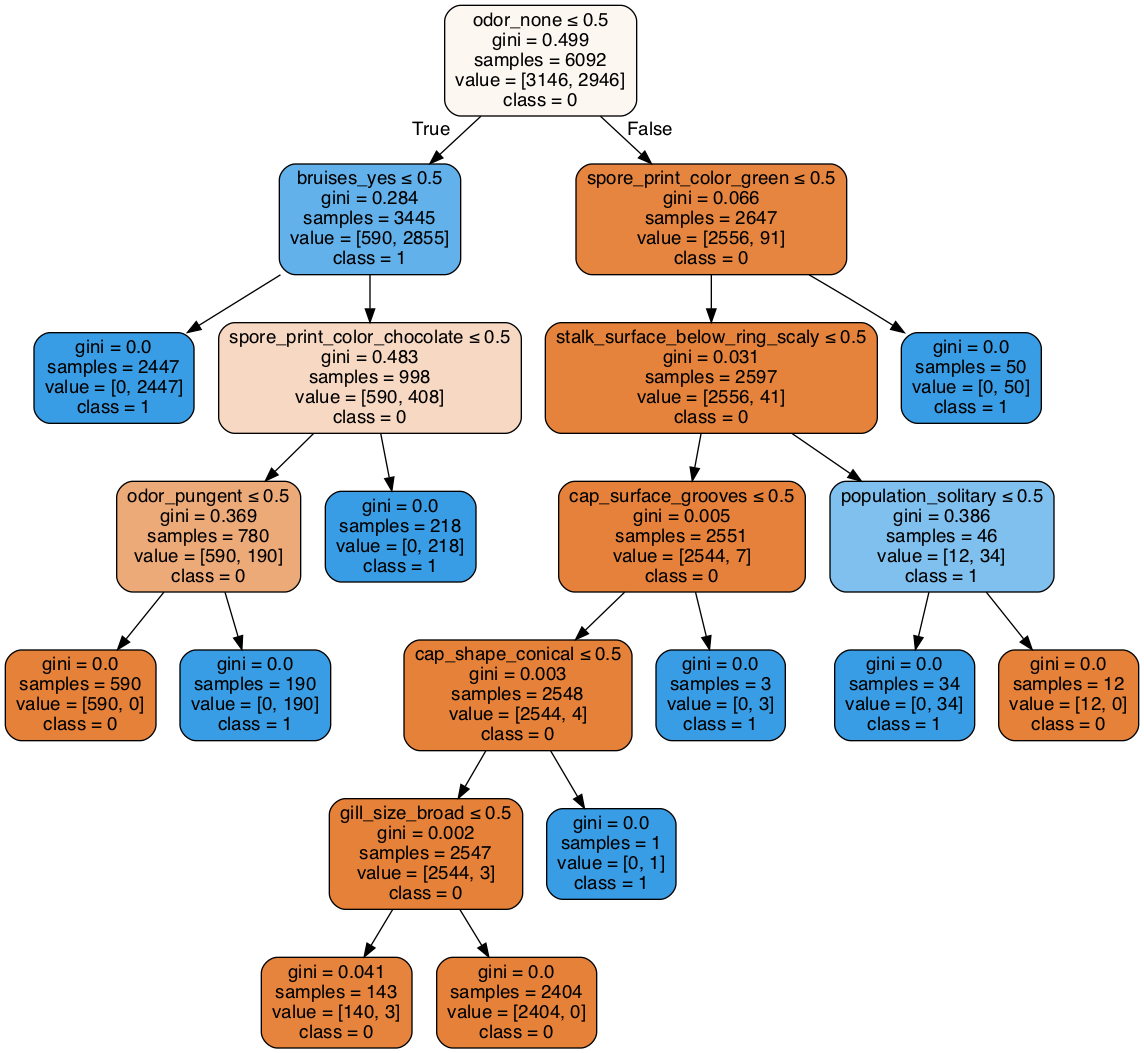

In [20]:
#Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# # Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [21]:
pred = tree_clf.predict(X_test)

In [22]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1062,0,1062
1,0,969,969
All,1062,969,2031


# Examine Feature Importance 

In [23]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

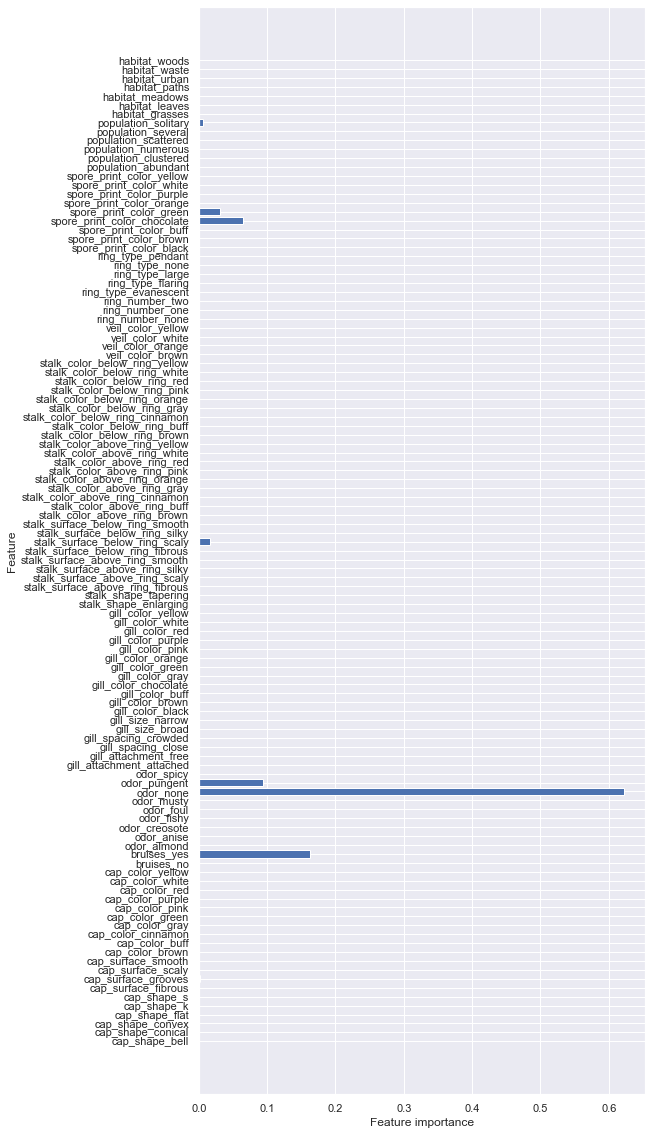

In [24]:
plot_feature_importances(tree_clf)

- Odor having the greatest feature importance is no surprise. 

- Spore print color "green" does not to appear to have any significance however it is included. While colors "chocolate" and "white" had visually appeared to have more of an effect during EDA.

- Stalk surface below ring does not visually appear to have any significant impact, however is classified as an important feature per this model.

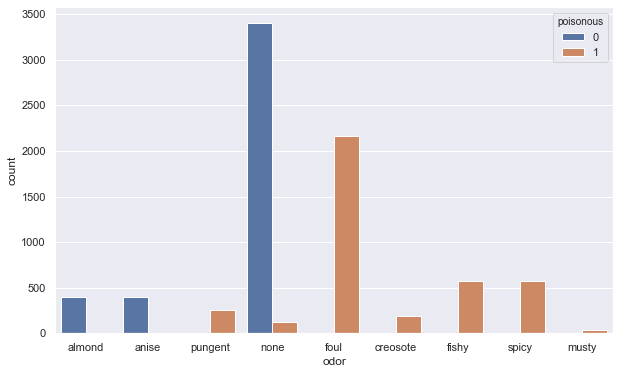

In [51]:

sns.set(rc={'figure.figsize':(10 ,6)})
sns.countplot(df['odor'], hue = 'poisonous', data = df)
#plt.title('Poisonous vs Edible')


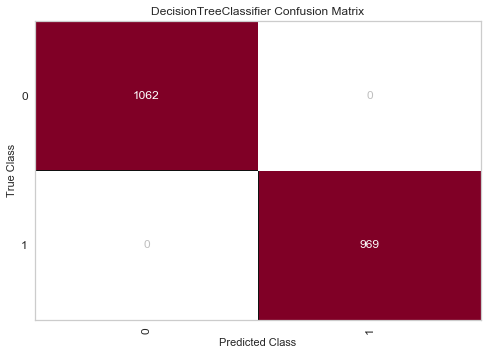

In [54]:

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(tree_clf, label_encoder = {0 : 'edible', 1: 'poisonous'})  #classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

# Random Forest

In [150]:
# Instantiate Classifier
forest = RandomForestClassifier(n_estimators = 5, max_depth = 5, max_features = 'auto')

In [151]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [152]:
forest.score(X_train, y_train)

0.9943059402893198

In [153]:
forest.score(X_test, y_test)

0.9895384615384616

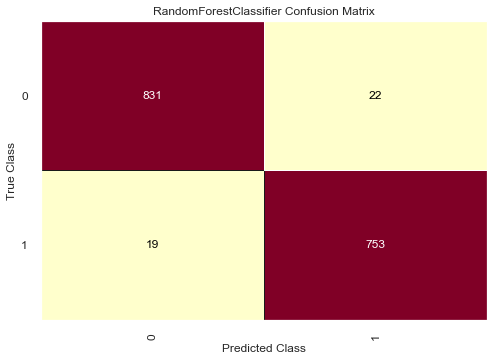

In [113]:

cm = ConfusionMatrix(forest)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model

cm.score(X_test, y_test)


cm.show()

In [154]:
pred = forest.predict(X_test)

In [155]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.99

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,836,17,853
1,0,772,772
All,836,789,1625


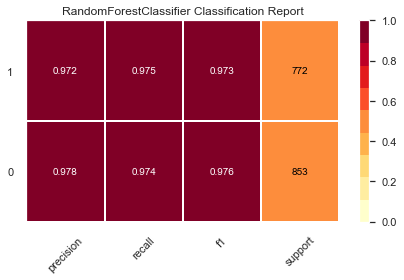

In [125]:
visualizer = ClassificationReport(forest, support = True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [117]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       853
           1       0.97      0.98      0.97       772

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



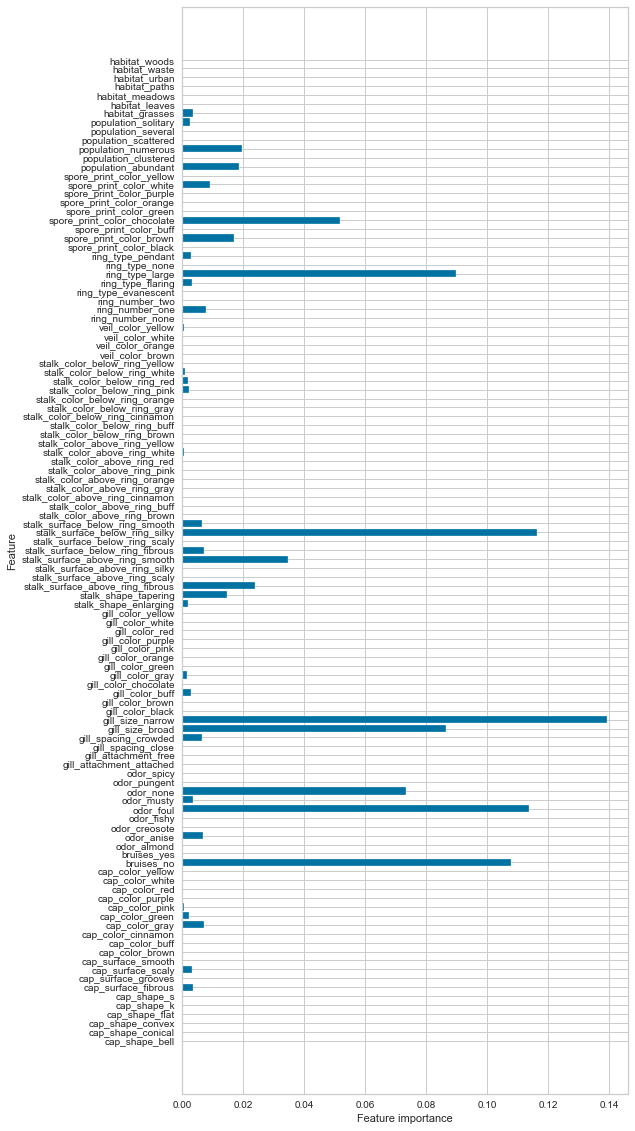

In [59]:
plot_feature_importances(forest)

# Tuning Random Forest with Cross Validation Grid Search

In [156]:
param_grid = {
    'n_estimators': [100, 400],
    'max_features': ['auto'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy'] 
}

In [157]:
CV = GridSearchCV(forest, param_grid, scoring= 'accuracy', cv = None, n_jobs =1)

In [158]:
CV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=5, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='war

In [159]:
best_parameters1 = CV.best_params_

In [160]:
best_parameters1

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [161]:
# Instantiate Classifier with recommended CV paramaeters

forest = RandomForestClassifier(n_estimators = 100, max_depth = 7, max_features = 'auto', criterion = 'gini')

In [162]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
forest.score(X_train, y_train)

1.0

In [164]:
forest.score(X_test, y_test)

1.0

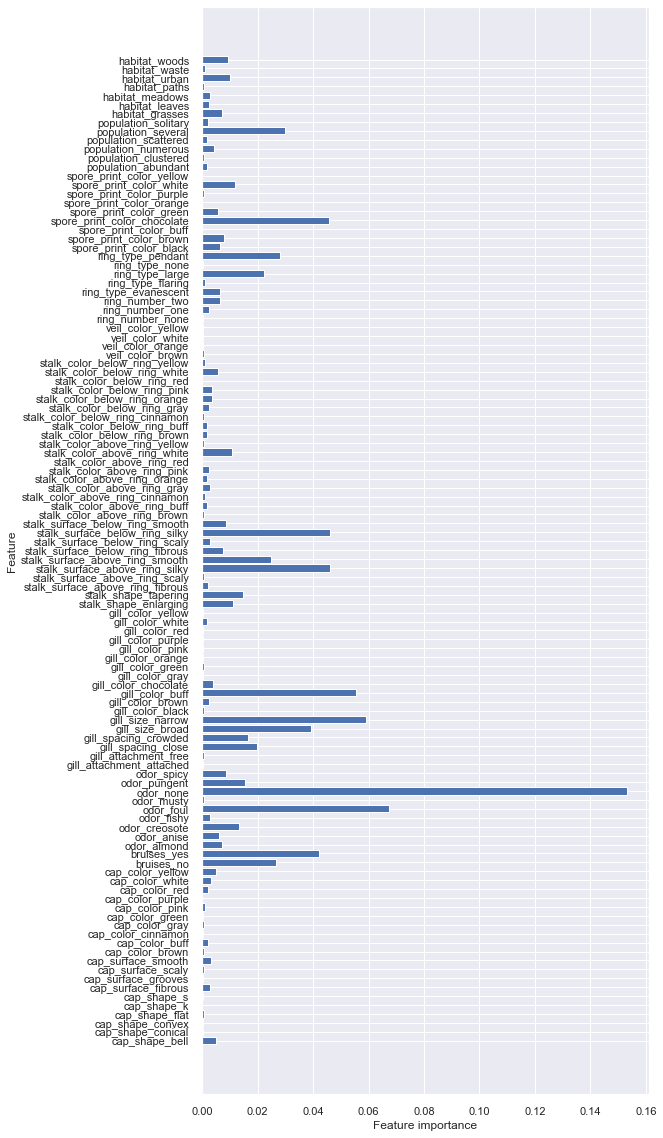

In [165]:
plot_feature_importances(forest)

In [ ]:
pred = forest.predict(X_test)

In [71]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1062,0,1062
1,0,969,969
All,1062,969,2031


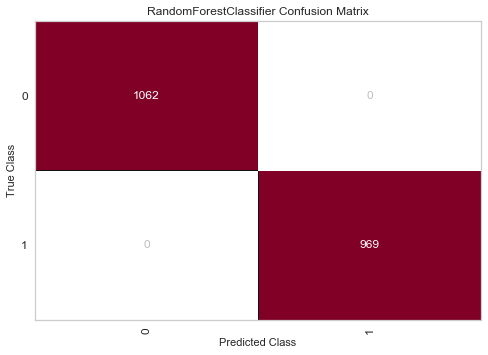

In [73]:

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(forest, label_encoder = {0 : 'edible', 1: 'poisonous'})  #classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

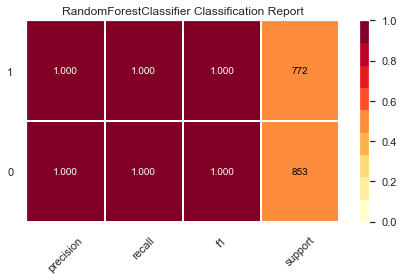

In [171]:
visualizer = ClassificationReport(forest, support = True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

 - PLOT ROC CURVE 

# XG Boost


In [76]:
from xgboost import XGBClassifier

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [77]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 100.0%


In [84]:
xg_score = classification_report(y_test, test_preds)

In [ ]:
# param_grid = {
#     'learning_rate': [0.1, 0.2],
#     'max_depth': [6],
#     'min_child_weight': [1, 2],
#     'subsample': [0.5, 0.7],
#     'n_estimators': [100],
# }

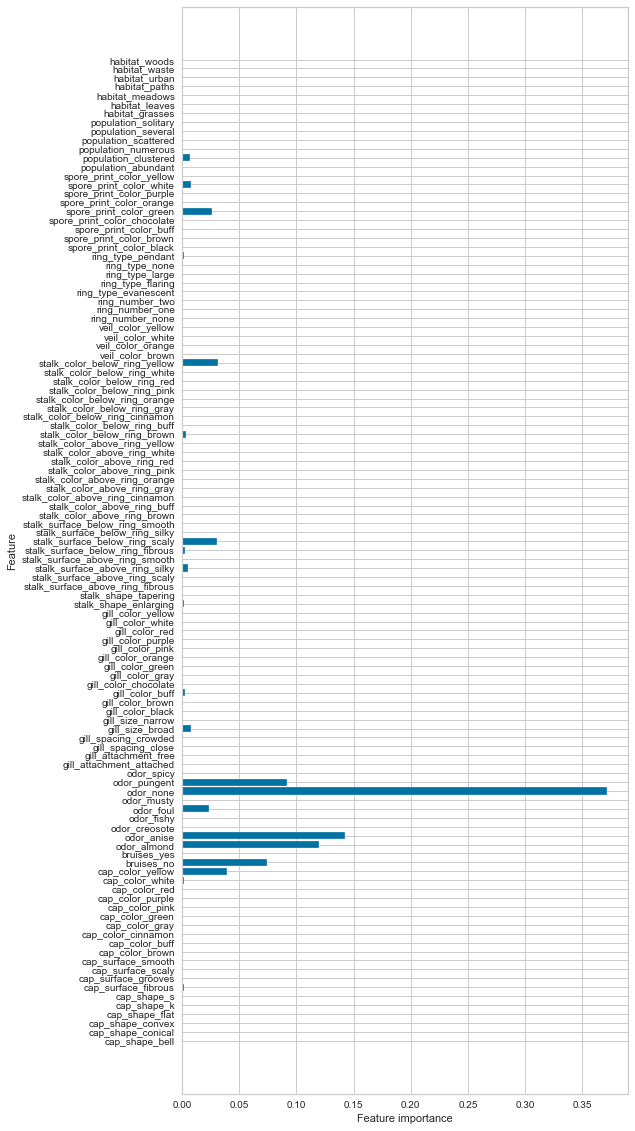

In [86]:
plot_feature_importances(clf)

# Naive Bayes 


In [172]:
gnb = GaussianNB()

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [176]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [177]:
gnb.score(X_test, y_test)

0.9852307692307692

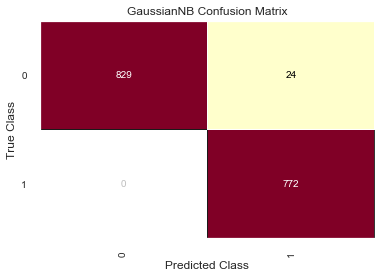

In [178]:


cm = ConfusionMatrix(gnb, label_encoder = {0 : 'edible', 1: 'poisonous'})  #classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
#cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()